In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
from tensorflow import estimator
import pandas as pd

site = 1615
tf.reset_default_graph()
df = pd.read_csv('./data/learning/{0}.csv'.format(site))
df['out']=df['out']*1
df.dropna(inplace=True)

#frameLen = len(df)
#trainLen = int(frameLen*0.6)
#evaluLen = frameLen - trainLen
#dfTrain  = df[ : trainLen ]
#dfEvalu  = df[ trainLen : ]

msk = np.random.rand(len(df)) < 0.6
dfTrain = df[msk]    
dfEvalu = df[~msk]


inShape = df.shape[1] - 1
feat_cols=[tf.feature_column.numeric_column('x', shape=[inShape])]

input_fn = estimator.inputs.numpy_input_fn(
    x = {'x':dfTrain.drop(['out'],axis=1).values},
    y = dfTrain['out'].values,
    shuffle    = True,
    num_epochs = 5000,
    batch_size = 100)

input_fn_eval = estimator.inputs.numpy_input_fn(
    x = {'x':dfEvalu.drop(['out'],axis=1).values},
    y =  dfEvalu['out'].values,
    shuffle    = False)

deep_model=tf.estimator.DNNClassifier(
    feature_columns = feat_cols,
    n_classes       = 2,
    hidden_units    = [100, 100, 100, 100, 100, 10, 10],
    activation_fn   = tf.nn.relu,
    optimizer       = tf.train.GradientDescentOptimizer(0.001),
    model_dir       = './model_{0}'.format(site))

gs = 0
for i in range(50):
    gs = gs + 300
    train_spec = tf.estimator.TrainSpec(input_fn = input_fn, max_steps = gs)
    eval_spec  = tf.estimator.EvalSpec(input_fn = input_fn_eval)
    tf.estimator.train_and_evaluate(deep_model, train_spec, eval_spec)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './model_1615', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f6996feda58>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Running training and evaluation locally (non-distributed).
INFO:tensorflow:Start train and evaluate loop. The evaluate will happen after 600 secs (eval_spec.throttle_secs) or training is finished.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflo

In [3]:
input_fn_eval = estimator.inputs.numpy_input_fn(
    x = {'x' : dfEvalu.drop(['out'],axis=1).values},
    shuffle = False)
preds=deep_model.predict(input_fn=input_fn_eval)

predictions = [p['class_ids'][0] for p in preds]
pred = np.asarray(predictions)

f = pred == dfEvalu['out'].values
print(len(f))

T = len(f[f == True])
F = len(f[f == False])
print(T, F, T+F)
error = F/(T+F) * 100
print(error)

#plt.scatter(range(len(y_test)),y_test,label="Original Rating")

#plt.legend(loc='best')
#plt.show()

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./model_1615/model.ckpt-15000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
1885
1778 107 1885
5.676392572944297


In [2]:
def normalize(df):    
    return (df - df.min()) / (df.max() - df.min())

def denormalize(df,norm_data):    
    return (norm_data * (df.max() - df.min())) + df.min()

In [ ]:
msk = np.random.rand(len(df)) < 0.65
df_train = df[msk]    
df_test = df[~msk]
print('Train Data Size:', len(df_train))
print('Evaluate Data Size:', len(df_test))
X_train = normalize(df_train.drop(['out'],axis=1)).values
y_train = df_train['out'].values

X_test = normalize(df_test.drop(['out'],axis=1)).values
y_test = df_test['out'].values

In [8]:
#msk = np.random.rand(len(df)) < 1
#df_test = df[msk]    
#X_test = normalize(df_test.drop(['out'],axis=1)).values
#y_test = df_test['out'].values
#len(y_test)

In [33]:
feat_cols=[tf.feature_column.numeric_column('x', shape=[1920])]


input_fn = estimator.inputs.numpy_input_fn(x={'x':X_train}, 
                                           y=y_train,
                                           shuffle= True,
                                           num_epochs=5000,
                                           batch_size=100)

input_fn_eval = estimator.inputs.numpy_input_fn( x = {'x':X_test},
                                                y =  y_test,
                                                shuffle = False)


In [31]:
deep_model=tf.estimator.DNNClassifier(feature_columns=feat_cols, 
                                      n_classes=2,
                                   hidden_units=[1500,1000,800,800,500,500, 300], 
                                   activation_fn=tf.nn.relu,
                                     optimizer=tf.train.GradientDescentOptimizer(0.001),
                                     model_dir='./model1')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_is_chief': True, '_num_worker_replicas': 1, '_save_summary_steps': 100, '_tf_random_seed': None, '_num_ps_replicas': 0, '_service': None, '_train_distribute': None, '_keep_checkpoint_max': 5, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa2d2eabd30>, '_task_id': 0, '_session_config': None, '_master': '', '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_keep_checkpoint_every_n_hours': 10000, '_task_type': 'worker', '_global_id_in_cluster': 0, '_model_dir': './model1', '_evaluation_master': ''}


In [32]:
input_fn = estimator.inputs.numpy_input_fn(x={'x':X_train}, 
                                           y=y_train,
                                           shuffle= True,
                                           num_epochs=5000,
                                           batch_size=100)

In [34]:
gs=500

In [39]:
%%time
for i in range(100):
    gs=gs+300
    train_spec = tf.estimator.TrainSpec(input_fn=input_fn, max_steps=gs)
    eval_spec = tf.estimator.EvalSpec(input_fn=input_fn_eval)
    tf.estimator.train_and_evaluate(deep_model, train_spec, eval_spec)

INFO:tensorflow:Running training and evaluation locally (non-distributed).
INFO:tensorflow:Start train and evaluate loop. The evaluate will happen after 600 secs (eval_spec.throttle_secs) or training is finished.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./model1/model.ckpt-93000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 93001 into ./model1/model.ckpt.
INFO:tensorflow:step = 93001, loss = 0.0006690451
INFO:tensorflow:global_step/sec: 27.0496
INFO:tensorflow:step = 93101, loss = 0.0021498566 (3.700 sec)
INFO:tensorflow:global_step/sec: 28.039
INFO:tensorflow:step = 93201, loss = 0.0014145651 (3.565 sec)
INFO:tensorflow:Saving checkpoints for 93300 into ./model1/model.ckpt.
INFO:tensorflow:Loss for final step: 0.0017718979.
INFO:tensorflow:Calling model_fn.


KeyboardInterrupt: 

In [27]:
#train = deep_model.train(input_f=input_fn, steps=10000)

In [197]:
input_fn_eval = estimator.inputs.numpy_input_fn( x = {'x':X_test},
                                                y =  y_test,
                                                shuffle = False)

preds=deep_model.evaluate(input_fn=input_fn_eval)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-06-11:21:29
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./model/model.ckpt-10001
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-06-11:21:30
INFO:tensorflow:Saving dict for global step 10001: accuracy = 0.51282054, accuracy_baseline = 0.5801282, auc = 0.427734, auc_precision_recall = 0.6506777, average_loss = 5.210544, global_step = 10001, label/mean = 0.5801282, loss = 541.8966, precision = 0.57004833, prediction/mean = 0.67027795, recall = 0.6519337


In [198]:
preds

{'accuracy': 0.51282054,
 'accuracy_baseline': 0.5801282,
 'auc': 0.427734,
 'auc_precision_recall': 0.6506777,
 'average_loss': 5.210544,
 'global_step': 10001,
 'label/mean': 0.5801282,
 'loss': 541.8966,
 'precision': 0.57004833,
 'prediction/mean': 0.67027795,
 'recall': 0.6519337}

In [188]:
input_fn_eval = estimator.inputs.numpy_input_fn( x = {'x':X_test},
                                            
                                                shuffle = False)

preds=deep_model.predict(input_fn=input_fn_eval)

In [189]:
predictions = [p['class_ids'][0] for p in preds]
#predictions

pred = np.asarray(predictions)

f = pred == y_test
print(len(f))

T = len(f[f == True])
F = len(f[f == False])
print(T, F, T+F)
error = F/(T+F) * 100
print(error)

#plt.scatter(range(len(y_test)),y_test,label="Original Rating")

#plt.legend(loc='best')
#plt.show()

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./model/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
1049
346 703 1049
67.01620591039085


In [21]:
predictions = [p['class_ids'][0] for p in preds]
#predictions

In [22]:
pred = np.asarray(predictions)

In [23]:
f = pred == y_test
print(len(f))

1152


In [24]:
T = len(f[f == True])
F = len(f[f == False])
print(T, F, T+F)
error = F/(T+F) * 100
print(error)

1009 143 1152
12.413194444444445


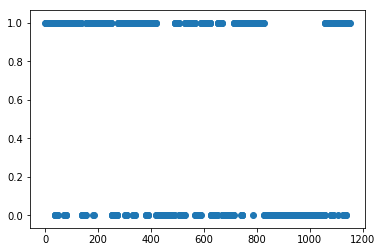

In [25]:
plt.scatter(range(len(y_test)),y_test,label="Original Rating")

#plt.legend(loc='best')
plt.show()

(-1, 2)

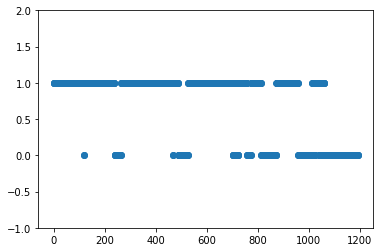

In [51]:
plt.scatter(range(len(pred)),pred,label="Predicted Rating", )
plt.ylim(-1,2)